<a href="https://colab.research.google.com/github/lilit616/Python_for_Data_Analysis/blob/master/boston_data_vs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
boston= pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
boston.head()
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64


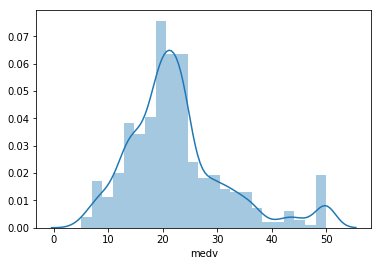

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
print(boston["medv"].describe());
sns.distplot(boston["medv"]);
#sns.catplot(x="rm",y="medv",kind="violin",data=boston);

In [0]:
#sns.jointplot(x="chas", y="medv", data=boston);
#boston.groupby(["chas"]).agg({'chas':'count'})
boston.groupby('chas').count()['medv']

chas
0    471
1     35
Name: medv, dtype: int64

In [0]:
boston[boston.medv==50]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,50.0


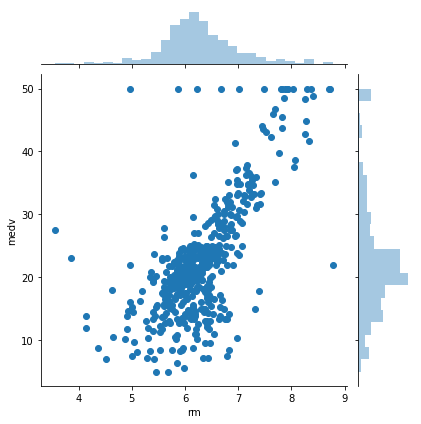

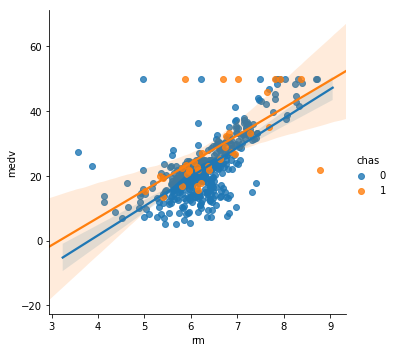

In [0]:
sns.jointplot(x="rm", y="medv", data=boston);
sns.lmplot(x="rm",y="medv",data=boston, hue="chas");
#sns.catplot(x="rm", y="medv", hue="chas",
#            kind="violin", split=True, data=boston);

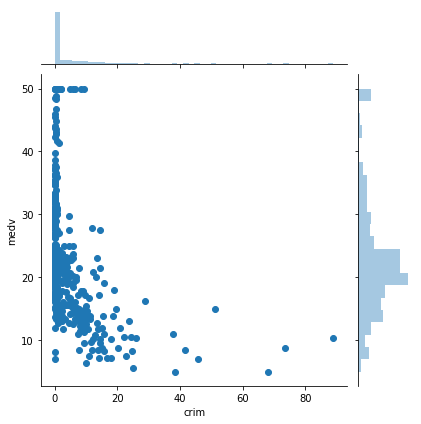

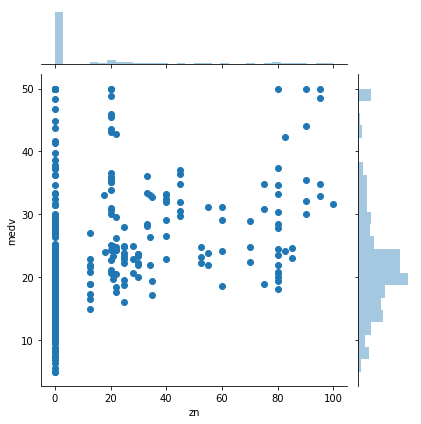

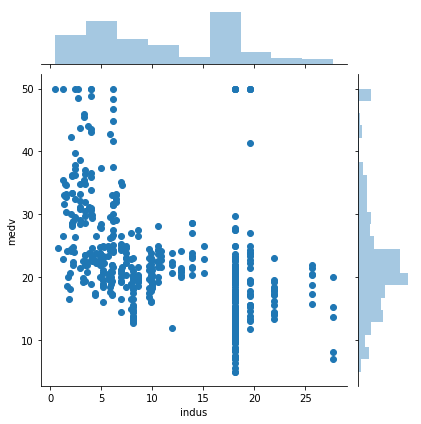

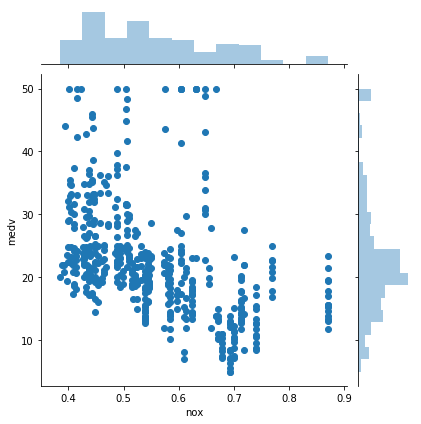

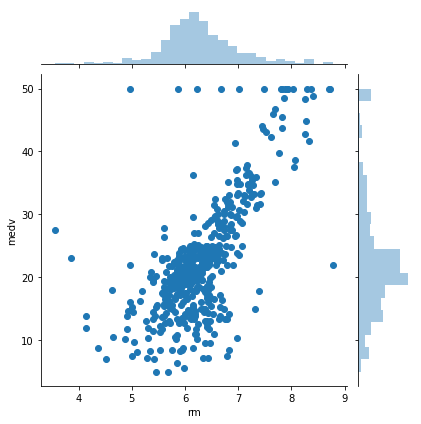

In [0]:
sns.jointplot(x="crim", y="medv", data=boston);
sns.jointplot(x="zn", y="medv", data=boston);
sns.jointplot(x="indus", y="medv", data=boston);
sns.jointplot(x="nox", y="medv", data=boston);
sns.jointplot(x="rm", y="medv", data=boston);
#plt.scatter(boston.medv,boston.rm);
#plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split


#boston_x=boston.drop(columns=['medv'],axis=1).values;
#boston_y=boston.drop(columns=['crim',	'zn',	'indus',	'chas',	'nox',	'rm',	'age',	'dis',	'rad',	'tax',	'ptratio',	'b'	,'lstat'],axis=1).values;

boston_x=boston.drop(columns=['medv'],axis=1).values;
boston_y=boston.drop(columns=['crim',	'zn',	'indus',	'chas',	'nox',	'rm',	'age',	'dis',	'rad',	'tax',	'ptratio',	'b'	,'lstat'],axis=1).values;
x_train, x_test, y_train, y_test = train_test_split(boston_x, boston_y, test_size=0.30, random_state=42);
#y_train.describe()

#print (y_train)
reg=LinearRegression();
reg.fit(x_train,y_train);
print(reg.score(x_train,y_train));
print(reg.coef_);
print(reg.intercept_);

#print(reg.predict(x_test))

#lab_enc = preprocessing.LabelEncoder()
#training_scores_encoded = lab_enc.fit_transform(y_trian)


#rf = RandomForestClassifier();
#rf.fit(x_train, y_train)


0.7434997532004697
[[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
  -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
   2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
  -5.47113313e-01]]
[31.63108404]


In [0]:
from itertools import combinations



features=boston_x.columns
features.shape[0]
boston_y =boston['medv'];
boston_x=boston.drop(columns=['medv'],axis=1);
x_train, x_test, y_train, y_test = train_test_split(boston_x, boston_y, test_size=0.30, random_state=42);
#print (x_train.shape)
#print (y_train.shape)
#print (x_test.shape)
#print (y_test.shape)

max_score=0
par=[]

for x in range(2,features.shape[0]):
  for c in combinations(features,x):
    cols = [col for col in boston_x.columns if col  in c]
    xx_train = x_train[cols]
    xx_test =  x_test[cols]
    reg=LinearRegression();
    reg.fit(xx_train,y_train);
    r=reg.score(xx_test,y_test);
    if r>max_score:
      max_score=r;
      par=c;
    

print (max_score) 
print (r)


In [0]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier() 
X_train_to_fit

NameError: ignored